# $\Delta\phi_{min}$ vs. $\langle n \rangle$ plots using number operator

In [1]:
%matplotlib inline

from math import *
from qutip import *
from pylab import *

from scipy.optimize import minimize as cp_minimize

import sympy as sp
import numpy as np
import matplotlib.pyplot as plt

### Symbols & operators

In [2]:
N = 60 # dimension of the Hilbert space
I = qeye(N) # identity operator
n = num(N); n_a = tensor(n, I); n_b = tensor(I, n) # number operators
S_n = n_a + n_b # ΣN = n_1 + n_2
a = destroy(N) # annihilation operator

### Functions for input states

In [3]:
# returns ρ_in given pure state ψ_in
def rho(psi):
    return psi*psi.dag()

# |ψ_in_1> = |0>|α>
def psi_in_1(alpha):
    return tensor(fock(N, 0),coherent(N, alpha))

# |ψ_in_2> = |β>|β>
def psi_in_2(beta):
    return tensor(coherent(N, beta),coherent(N, beta))
    
# |ψ_in_3> = N(|γδ>+|δγ>)
def psi_in_3(gamma, delta):
    temp = tensor(coherent(N, gamma), coherent(N, delta)) + tensor(coherent(N, delta), coherent(N, gamma))
    return temp.unit()

# |ψ_in_4> = N(a_1†|α_1,α_2>+a_2†|α_1,α_2>)
def psi_in_4(alpha_1, alpha_2):
    psi_alphas = tensor(coherent(N, alpha_1),coherent(N, alpha_2)) # |α_1,α_2>
    temp = tensor(a.dag(), I)*psi_alphas + tensor(I, a.dag())*psi_alphas
    return temp.unit()
    
# |ψ_in_5> = N(a_1†²|α_1,α_2>+a_2†²|α_1,α_2>)    
def psi_in_5(alpha_1, alpha_2):
    psi_alphas = tensor(coherent(N, alpha_1), coherent(N, alpha_2)) # |α_1,α_2>
    temp = tensor(a.dag()**2, I)*psi_alphas + tensor(I, a.dag()**2)*psi_alphas
    return temp.unit()

### Helper functions

In [4]:
def make_plot(n_avgs, phi_std_dev_mins, plot_name):
    plt.plot(n_avgs, phi_std_dev_mins, 'bo-', label=r'$\Delta\phi_{min}$')
    plt.plot(n_avgs, 1/np.sqrt(n_avgs), 'y.-', label=r'$1/\sqrt{\langle n \rangle}$')
    plt.plot(n_avgs, 1/np.array(n_avgs), 'go-', label=r'$1/\langle n \rangle$')

    plt.yscale('log')
    plt.xlabel(r'$\langle n \rangle$')
    plt.legend(loc='best')

    plt.savefig(plot_name)

## Numerical Schrödinger picture 1

In [5]:
n_1_avgs = []; phi_1_std_dev_mins = []
n_2_avgs = []; phi_2_std_dev_mins = []

file = open("number_numerical_Schrödinger_1_12.txt", "r")

for line in file:
    if not line.startswith('#'):
        data = line.split()
        rho_in_1 = rho(psi_in_1(float(data[0])))
        rho_in_2 = rho(psi_in_2(float(data[2])))
        n_1_avgs.append(np.abs((rho_in_1*S_n).tr()))
        n_2_avgs.append(np.abs((rho_in_2*S_n).tr()))
        
        phi_1_std_dev_mins.append(float(data[1]))
        phi_2_std_dev_mins.append(float(data[3]))

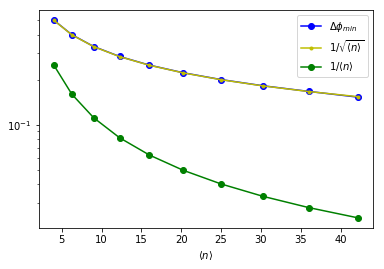

In [6]:
make_plot(n_1_avgs,phi_1_std_dev_mins,"number_numerical_Schrödinger_1/1.png")

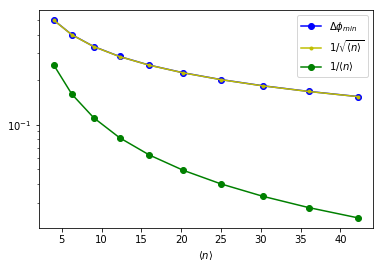

In [7]:
make_plot(n_2_avgs,phi_2_std_dev_mins,"number_numerical_Schrödinger_1/2.png")

In [8]:
n_3_avgs = []; phi_3_std_dev_mins = []
n_4_avgs = []; phi_4_std_dev_mins = []
n_5_avgs = []; phi_5_std_dev_mins = []

file = open("number_numerical_Schrödinger_1_345.txt", "r")

for line in file:
    if not line.startswith('#'):
        data = line.split()
        alpha_1 = float(data[0])
        alpha_2 = float(data[1])
        rho_in_3 = rho(psi_in_3(alpha_1,alpha_2))
        rho_in_4 = rho(psi_in_4(alpha_1,alpha_2))
        rho_in_5 = rho(psi_in_5(alpha_1,alpha_2))
        n_3_avgs.append(np.abs((rho_in_3*S_n).tr()))
        n_4_avgs.append(np.abs((rho_in_4*S_n).tr()))
        n_5_avgs.append(np.abs((rho_in_5*S_n).tr()))
        
        phi_3_std_dev_mins.append(float(data[2]))
        phi_4_std_dev_mins.append(float(data[3]))
        phi_5_std_dev_mins.append(float(data[4]))

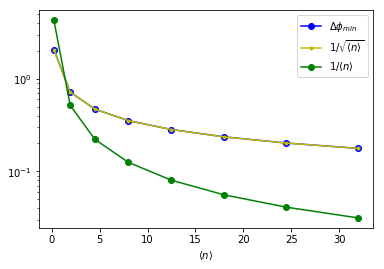

In [9]:
make_plot(n_3_avgs,phi_3_std_dev_mins,"number_numerical_Schrödinger_1/3.png")

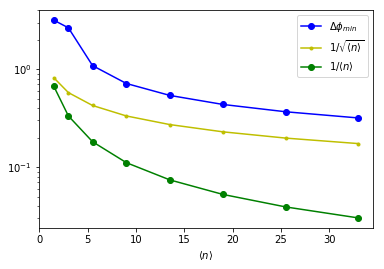

In [10]:
make_plot(n_4_avgs,phi_4_std_dev_mins,"number_numerical_Schrödinger_1/4.png")

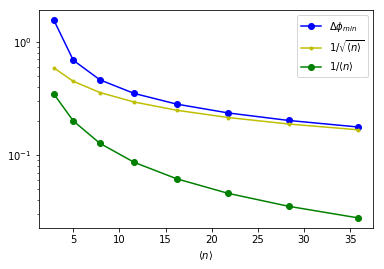

In [11]:
make_plot(n_5_avgs,phi_5_std_dev_mins,"number_numerical_Schrödinger_1/5.png")

## Symbolic Heisenberg picture 1

In [12]:
n_1_avgs = []; phi_1_std_dev_mins = []
n_2_avgs = []; phi_2_std_dev_mins = []

file = open("number_symbolic_Heisenberg_1_12.txt", "r")

for line in file:
    if not line.startswith('#'):
        data = line.split()
        rho_in_1 = rho(psi_in_1(float(data[0])))
        rho_in_2 = rho(psi_in_2(float(data[2])))
        n_1_avgs.append(np.abs((rho_in_1*S_n).tr()))
        n_2_avgs.append(np.abs((rho_in_2*S_n).tr()))
        
        phi_1_std_dev_mins.append(float(data[1]))
        phi_2_std_dev_mins.append(float(data[3]))

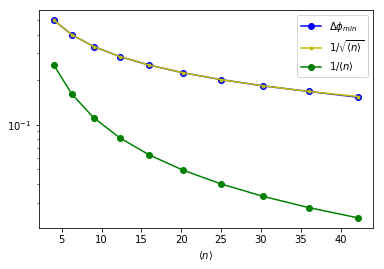

In [13]:
make_plot(n_1_avgs,phi_1_std_dev_mins,"number_symbolic_Heisenberg_1/1.png")

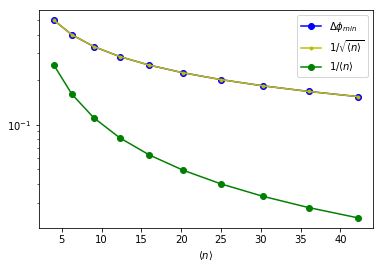

In [14]:
make_plot(n_2_avgs,phi_2_std_dev_mins,"number_symbolic_Heisenberg_1/2.png")

In [15]:
n_3_avgs = []; phi_3_std_dev_mins = []
n_4_avgs = []; phi_4_std_dev_mins = []
n_5_avgs = []; phi_5_std_dev_mins = []

file = open("number_symbolic_Heisenberg_1_345.txt", "r")

for line in file:
    if not line.startswith('#'):
        data = line.split()
        alpha_1 = float(data[0])
        alpha_2 = float(data[1])
        rho_in_3 = rho(psi_in_3(alpha_1,alpha_2))
        rho_in_4 = rho(psi_in_4(alpha_1,alpha_2))
        rho_in_5 = rho(psi_in_5(alpha_1,alpha_2))
        n_3_avgs.append(np.abs((rho_in_3*S_n).tr()))
        n_4_avgs.append(np.abs((rho_in_4*S_n).tr()))
        n_5_avgs.append(np.abs((rho_in_5*S_n).tr()))
        
        phi_3_std_dev_mins.append(float(data[2]))
        phi_4_std_dev_mins.append(float(data[3]))
        phi_5_std_dev_mins.append(float(data[4]))

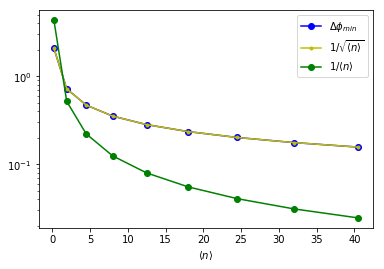

In [16]:
make_plot(n_3_avgs,phi_3_std_dev_mins,"number_symbolic_Heisenberg_1/3.png")

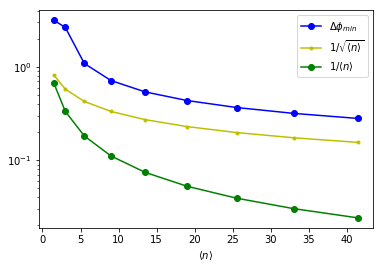

In [17]:
make_plot(n_4_avgs,phi_4_std_dev_mins,"number_symbolic_Heisenberg_1/4.png")

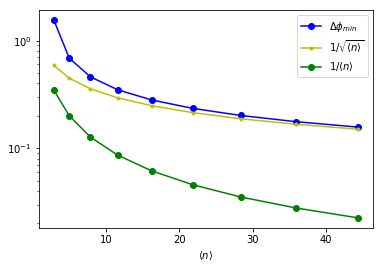

In [18]:
make_plot(n_5_avgs,phi_5_std_dev_mins,"number_symbolic_Heisenberg_1/5.png")